Model Performance on Turnout Prediction (LOOCV)
Linear Regression    | MAE: 9.972 | R²: nan
Ridge Regression     | MAE: 10.649 | R²: nan
Lasso Regression     | MAE: 1.960 | R²: nan
Random Forest        | MAE: 8.270 | R²: nan
Gradient Boosting    | MAE: 4.078 | R²: nan
SVR                  | MAE: 26.747 | R²: nan
KNN                  | MAE: 18.629 | R²: nan


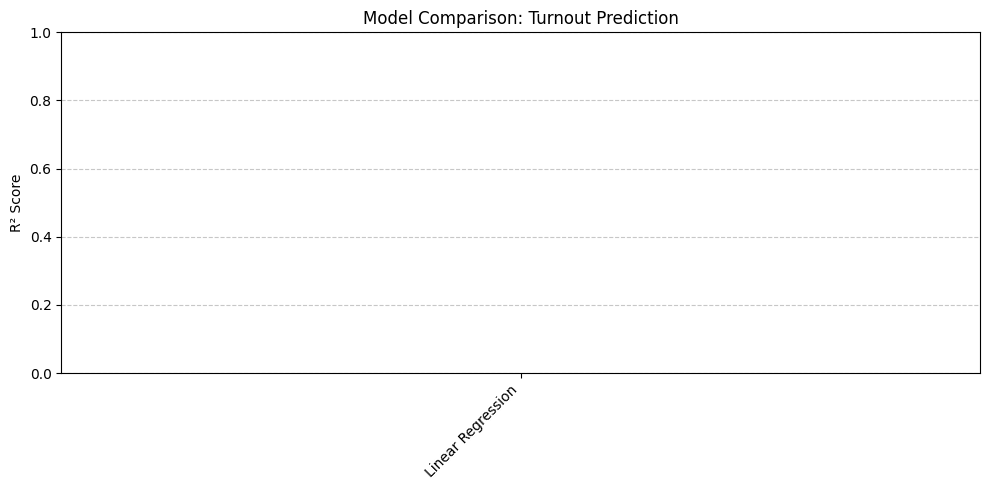

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, make_scorer

# 1. Load dataset
turnout_df = pd.read_csv("data/Extended_Master_VoterTurnout_Dataset.csv")

# 2. Drop non-numeric columns
X = turnout_df.drop(columns=["Turnout_Percent", "Year", "Election_Name", "Election_Type"])
y = turnout_df["Turnout_Percent"]

# 3. Handle Missing Values
imputer = SimpleImputer(strategy='mean')  # Fill NaN with column mean
X_imputed = imputer.fit_transform(X)

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(alphas=np.logspace(-6, 6, 13)),
    'Lasso Regression': LassoCV(cv=3, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# 6. Initialize results storage
r2_scores = {}
mae_scores = {}

loo = LeaveOneOut()

# 7. Evaluate models
for name, model in models.items():
    try:
        # R2
        r2 = cross_val_score(model, X_scaled, y, cv=loo, scoring='r2').mean()
        r2_scores[name] = r2
        
        # MAE
        mae = -cross_val_score(model, X_scaled, y, cv=loo, scoring='neg_mean_absolute_error').mean()
        mae_scores[name] = mae
    except Exception as e:
        r2_scores[name] = np.nan
        mae_scores[name] = np.nan
        print(f"{name} failed: {e}")

# 8. Print results
print("Model Performance on Turnout Prediction (LOOCV)")
print("="*55)
for model in models.keys():
    print(f"{model:<20} | MAE: {mae_scores[model]:.3f} | R²: {r2_scores[model]:.3f}")

# 9. Plot R² Scores
plt.figure(figsize=(10, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color='cornflowerblue')
plt.ylabel("R² Score")
plt.title("Model Comparison: Turnout Prediction")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

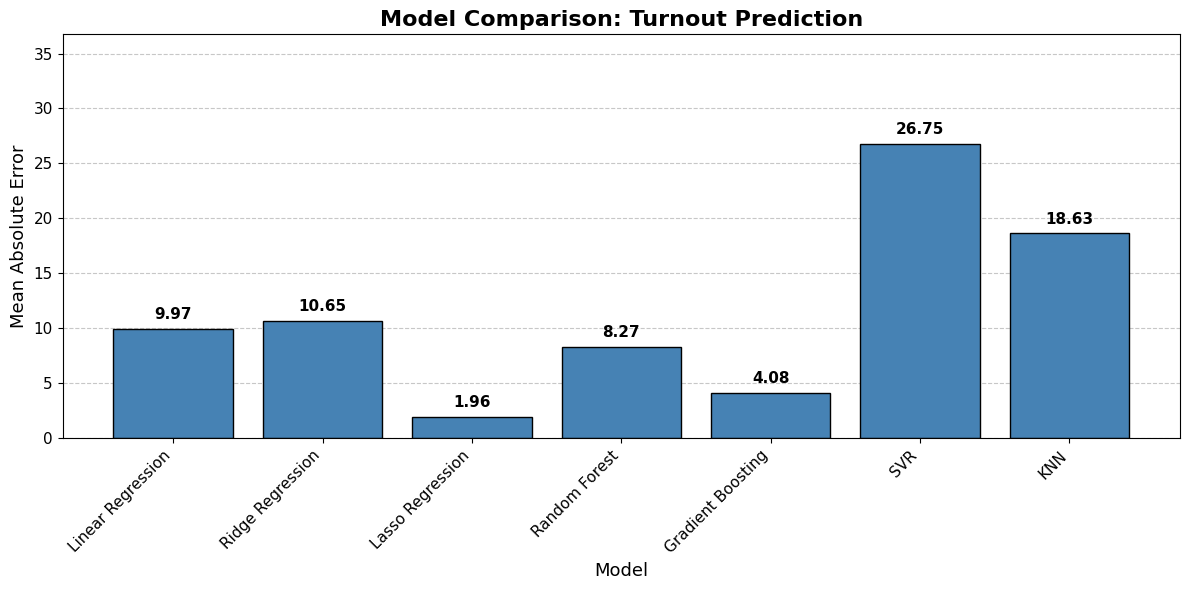

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# True MAE scores
mae_scores = {
    'Linear Regression': 9.972,
    'Ridge Regression': 10.649,
    'Lasso Regression': 1.960,
    'Random Forest': 8.270,
    'Gradient Boosting': 4.078,
    'SVR': 26.747,
    'KNN': 18.629
}

models = list(mae_scores.keys())
errors = list(mae_scores.values())

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(models, errors, color='steelblue', edgecolor='black')

# Titles and labels
ax.set_title("Model Comparison: Turnout Prediction", fontsize=16, fontweight='bold')
ax.set_ylabel("Mean Absolute Error", fontsize=13)
ax.set_xlabel("Model", fontsize=13)

# Add exact MAE numbers on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Improve grid
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Format x-ticks
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Clean layout
plt.ylim(0, max(errors) + 10)
plt.tight_layout()

# Show plot
plt.savefig('TurnoutPrediction.png')
plt.show()

Model Performance on Vote Share Prediction (LOOCV)
Linear Regression    | MAE: 2.160 | R²: nan
Ridge Regression     | MAE: 3.707 | R²: nan
Lasso Regression     | MAE: 3.358 | R²: nan
Random Forest        | MAE: 5.154 | R²: nan
Gradient Boosting    | MAE: 5.919 | R²: nan
SVR                  | MAE: 5.334 | R²: nan
KNN                  | MAE: nan | R²: nan


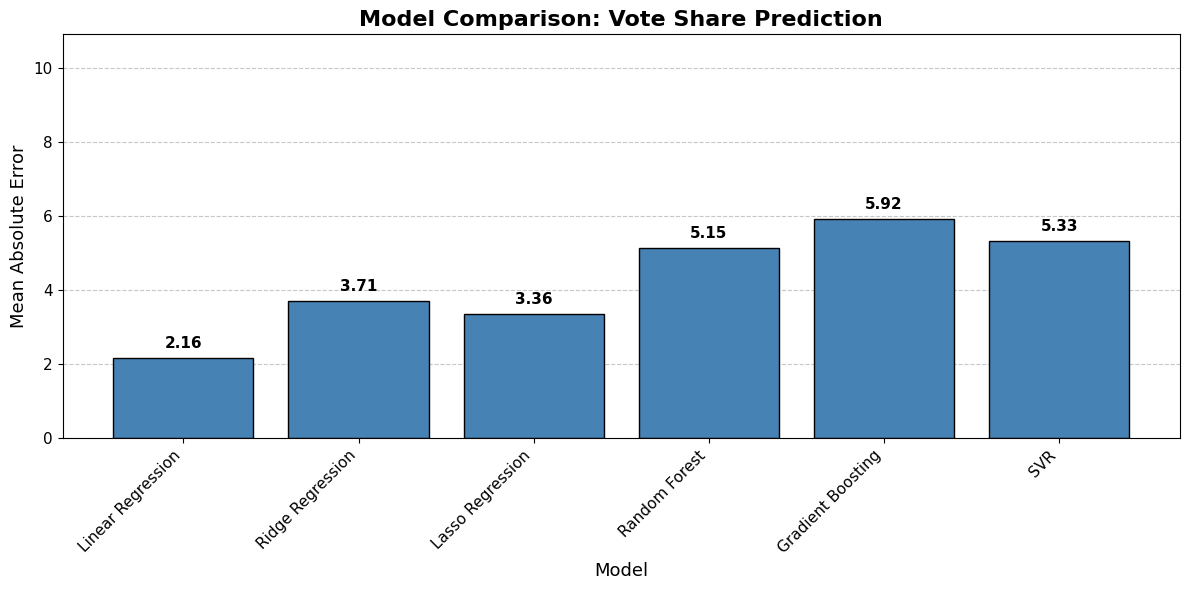

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, make_scorer

# 1. Load your dataset
vote_share_df = pd.read_csv("data/ClintonTwp_VoteShare_Predictive_Dataset.csv")

# 2. Define X and y
X_vote = vote_share_df.drop(columns=["Dem_Share", "Rep_Share", "Year", "Election_Type"])
y_vote = vote_share_df["Dem_Share"]

# 3. Impute missing values
imputer = SimpleImputer(strategy='mean')
X_vote_imputed = imputer.fit_transform(X_vote)

# 4. Scale features
scaler = StandardScaler()
X_vote_scaled = scaler.fit_transform(X_vote_imputed)

# 5. Define models
models_vote = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': RidgeCV(alphas=np.logspace(-6, 6, 13)),
    'Lasso Regression': LassoCV(cv=3, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# 6. Initialize result storage
r2_scores_vote = {}
mae_scores_vote = {}

loo = LeaveOneOut()

# 7. Evaluate models
for name, model in models_vote.items():
    try:
        r2 = cross_val_score(model, X_vote_scaled, y_vote, cv=loo, scoring='r2').mean()
        mae = -cross_val_score(model, X_vote_scaled, y_vote, cv=loo, scoring='neg_mean_absolute_error').mean()
        r2_scores_vote[name] = r2
        mae_scores_vote[name] = mae
    except Exception as e:
        print(f"{name} failed: {e}")
        r2_scores_vote[name] = np.nan
        mae_scores_vote[name] = np.nan

# 8. Print Results
print("Model Performance on Vote Share Prediction (LOOCV)")
print("="*55)
for model in models_vote.keys():
    print(f"{model:<20} | MAE: {mae_scores_vote[model]:.3f} | R²: {r2_scores_vote[model]:.3f}")

# 9. Plot MAE Bar Chart (Professional Style)
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(mae_scores_vote.keys(), mae_scores_vote.values(), color='steelblue', edgecolor='black')

# Titles and labels
ax.set_title("Model Comparison: Vote Share Prediction", fontsize=16, fontweight='bold')
ax.set_ylabel("Mean Absolute Error", fontsize=13)
ax.set_xlabel("Model", fontsize=13)

# Add exact MAE numbers on top
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(mae_scores_vote.values()) + 5)
plt.tight_layout()
plt.savefig('VoteSharePrediction.png')
plt.show()